In [1]:

import functools

PLOT_REGISTER = dict()
plot_id = 1
def register_fig(func):
    '''
    given a function that returns a figure
    this decorator will save that figure to a dictionary called PLOT_REGISTER
    If the function has a keyword argument 'title', the function will be saved
    as a title
    '''
    @functools.wraps(func)
    def wrapper(*args,**kwargs):
        global plot_id
        if kwargs.get('title') is None:
            kwargs['title']=plot_id
            plot_id+=1
        fig = func(*args,**kwargs)
        PLOT_REGISTER[kwargs['title']] = fig
        
        return fig
    return wrapper





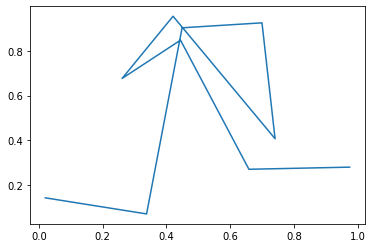

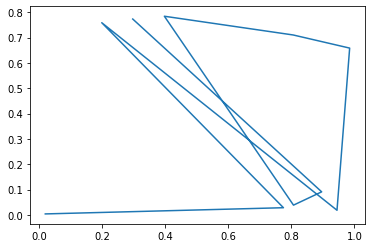

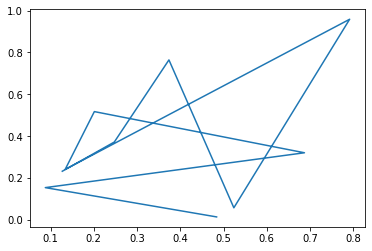

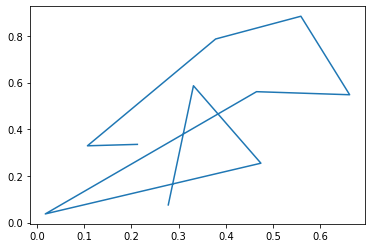

In [2]:
import matplotlib.pyplot as plt
import numpy as np
def plot_rand(ax):
    '''
    plots some random numbers, returns the axis
    '''
    x = [np.random.rand() for x in np.arange(10)]
    y = [np.random.rand() for x in np.arange(10)]
    ax.plot(x, y)
    return ax

@register_fig
def make_fig(title):
    '''
    Function to make a figure with a keyword argument title
    '''
    fig,ax = plt.subplots()
    plot_rand(ax)
    return fig
    
make_fig(title = 'Frank');
make_fig(title = 'zebra');
make_fig();
make_fig();

## Plots are available via the dictionary PLOT_REGISTER

In [3]:
list(PLOT_REGISTER.keys())

['Frank', 'zebra', 1, 2]

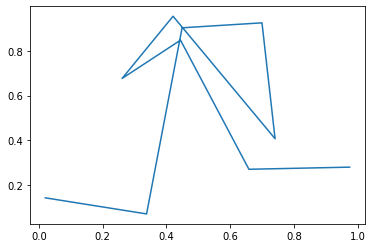

In [4]:
PLOT_REGISTER['Frank']

# This is a simple example of how you can use this to quickly walk through graphs

In [6]:
import ipywidgets as widgets
def select_plot(REGISTER=PLOT_REGISTER):
    '''
    Returns a widget with a dropdown whose values are the dictionary keys of REGISTER
    The drop down will display the value of what is in REGISTER
    '''
    selection = widgets.Dropdown(
        options=REGISTER.keys(),
        value=list(REGISTER.keys())[0],
        description='Select Plot:',
        disabled=False,
    )
    key = selection.value
    
    def show_plot(key):
        display(REGISTER[key])
    out = widgets.interactive_output(show_plot,{'key':selection})
    return widgets.VBox([selection,out])

select_plot()